# SI 618 WN 2018 - Homework 5: Using the Spark SQL to analyze Yelp Business Data

## Objectives
1. To gain familiarity with Spark SQL;
2. To master filtering, aggregating, and sorting a Spark DataFrame;
3. To learn joining multiple Spark DataFrames;
3. To review visualizing Pandas DataFrame using Seaborn.

## Please fill in...
### * Your name: Anthony Cozart
### * People you worked with:  

## Submission Instructions:
Please turn in this Jupyter notebook file (in both .ipynb and .html formats) via Canvas.

## Overview

This project is designed to give you a basic familiarity with the Apache Spark SQL module.

## Data
We are going to use Yelp academic dataset. We will conduct a city-level analysis throughout the assignment. The descriptions of the data can be found on here: https://www.yelp.com/dataset/documentation/json

In [125]:
from pyspark.sql import SparkSession

In [126]:
from pyspark.sql import functions as F
from pyspark.sql.functions import array_contains, col, explode

### Step 1a: Initialize a SparkSession

In [127]:
spark = SparkSession \
    .builder \
    .appName("Cozart Hw 5 pyspark") \
    .getOrCreate()

### Step 1b: Load the JSON file into Spark

In [128]:
df = spark.read.json("yelp_academic_dataset_business.json")

### Step 1c: Print the schema and familiarize yourself with the structure of the dataset

In [129]:
df.printSchema()
print("The number of rows of the dataset is: ", df.count())
print("The number of columns of the dataset is: ", len(df.columns))

root
 |-- attributes: struct (nullable = true)
 |    |-- Accepts Credit Cards: boolean (nullable = true)
 |    |-- Accepts Insurance: boolean (nullable = true)
 |    |-- Ages Allowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: struct (nullable = true)
 |    |    |-- casual: boolean (nullable = true)
 |    |    |-- classy: boolean (nullable = true)
 |    |    |-- divey: boolean (nullable = true)
 |    |    |-- hipster: boolean (nullable = true)
 |    |    |-- intimate: boolean (nullable = true)
 |    |    |-- romantic: boolean (nullable = true)
 |    |    |-- touristy: boolean (nullable = true)
 |    |    |-- trendy: boolean (nullable = true)
 |    |    |-- upscale: boolean (nullable = true)
 |    |-- Attire: string (nullable = true)
 |    |-- BYOB: boolean (nullable = true)
 |    |-- BYOB/Corkage: string (nullable = true)
 |    |-- By Appointment Only: boolean (nullable = true)
 |    |-- Caters: boolean (nullable = true)
 |    |-- Coat Chec

In [130]:
df.show(1)

+--------------------+--------------------+--------------------+----------+--------------------+--------------------+----------+-----------+---------+-------------+----+------------+-----+-----+--------+
|          attributes|         business_id|          categories|      city|        full_address|               hours|  latitude|  longitude|     name|neighborhoods|open|review_count|stars|state|    type|
+--------------------+--------------------+--------------------+----------+--------------------+--------------------+----------+-----------+---------+-------------+----+------------+-----+-----+--------+
|[true,null,null,n...|5UmKMjUEUNdYWqANh...|[Fast Food, Resta...|Dravosburg|4734 Lebanon Chur...|[[21:00,11:00],[2...|40.3543266|-79.9007057|Mr Hoagie|           []|true|           7|  3.5|   PA|business|
+--------------------+--------------------+--------------------+----------+--------------------+--------------------+----------+-----------+---------+-------------+----+------------+--

In [131]:
us_states_list = ["AL","AK","AZ","CA","FL","IL","MN","NM","NC","NV","PA","TX","SC","WI"]

In [132]:
# check if this list is comprehensive
all_states = df.groupBy(df['state']).agg(({'business_id': 'count'})).orderBy(['count(business_id)'], ascending=False)
all_states.show(50)

+-----+------------------+
|state|count(business_id)|
+-----+------------------+
|   AZ|             36500|
|   NV|             23591|
|   NC|              6835|
|   QC|              5591|
|   PA|              4086|
|  EDH|              3297|
|   WI|              3066|
|   BW|              1055|
|   IL|               808|
|   ON|               530|
|   SC|               325|
|  MLN|               161|
|   RP|                18|
|  ELN|                11|
|  FIF|                 5|
|   CA|                 4|
|   TX|                 3|
|   FL|                 2|
|  SCB|                 2|
|   MN|                 1|
|  NTH|                 1|
|   NW|                 1|
|  HAM|                 1|
|   NM|                 1|
|  KHL|                 1|
|  XGL|                 1|
|   AL|                 1|
|  TAM|                 1|
|     |                 1|
|   AK|                 1|
+-----+------------------+



### Step 2: Filter "df" to include only businesses in the United States.

In [133]:
US = df.filter(df['state'].isin(us_states_list))
print("The number of rows of the US ONLY dataset is: ", US.count())
print("Note: columns unchanged")

The number of rows of the US ONLY dataset is:  75224
Note: columns unchanged


### Step 3: Show the U.S. cities, and their number of businesses in descending order.

In [134]:
biz_count = US.groupBy(['city']).agg({'business_id': 'count'}).orderBy(['count(business_id)'], ascending=False)

In [135]:
biz_count.show()

+---------------+------------------+
|           city|count(business_id)|
+---------------+------------------+
|      Las Vegas|             19327|
|        Phoenix|             11852|
|      Charlotte|              5695|
|     Scottsdale|              5638|
|           Mesa|              3638|
|     Pittsburgh|              3628|
|      Henderson|              3145|
|          Tempe|              3043|
|       Chandler|              2702|
|        Madison|              2278|
|       Glendale|              2048|
|        Gilbert|              1941|
|         Peoria|              1081|
|North Las Vegas|               952|
|       Surprise|               681|
|       Goodyear|               507|
|      Champaign|               505|
|       Avondale|               427|
|       Matthews|               399|
|    Queen Creek|               383|
+---------------+------------------+
only showing top 20 rows



### Step 4: Show the frequency distribution of stars in the U.S., ordered by stars from 1.0 to 5.0.

In [136]:
stars_distribution = US.groupBy('stars').agg({'stars': 'count'}).orderBy(['stars'], ascending=True).show()

+-----+------------+
|stars|count(stars)|
+-----+------------+
|  1.0|        1041|
|  1.5|        1770|
|  2.0|        3494|
|  2.5|        6768|
|  3.0|        9709|
|  3.5|       14146|
|  4.0|       14480|
|  4.5|       11467|
|  5.0|       12349|
+-----+------------+



### Step 5a: Find the list of U.S. cities that have at least(>=) 50 businesses.

In [137]:
cities = biz_count.filter(biz_count['count(business_id)'] >= 50).orderBy(['city'], ascending=True)
cities.show()

+---------------+------------------+
|           city|count(business_id)|
+---------------+------------------+
|         Anthem|               135|
|Apache Junction|               186|
|       Avondale|               427|
|        Belmont|                83|
|        Buckeye|               163|
|       Carefree|                54|
|       Carnegie|                62|
|    Casa Grande|               201|
|     Cave Creek|               266|
|      Champaign|               505|
|       Chandler|              2702|
|      Charlotte|              5695|
|        Concord|               185|
|      El Mirage|                63|
|      Fitchburg|               136|
|      Fort Mill|               287|
| Fountain Hills|               204|
|        Gilbert|              1941|
|       Glendale|              2048|
|       Goodyear|               507|
+---------------+------------------+
only showing top 20 rows



### Step 5b: Filter "US" using the list of cities from 6a, to restrict our attention to cities with at least 50 businesses reviewed.

In [138]:
cities.count()

50

In [139]:
cities_list = cities.select('city').rdd.map(lambda row : row[0]).collect()

In [140]:
print(type(cities_list))
# check that the list has the same n of elements as the DataFrame column
print(len(cities_list))

<class 'list'>
50


In [141]:
US_large = US.filter(US['city'].isin(cities_list))
US_large.count()

73974

In [142]:
print("By restricting our attention to cities with at least 50 businesses reviewed in Yelp, we lose {0:%} of reviews.".format(1-(US_large.count()/US.count())))

By restricting our attention to cities with at least 50 businesses reviewed in Yelp, we lose 1.661704% of reviews.


### Step 6a: Compute the average stars for each city.

The Spark DataFrame should look similar to this:

| city | avg(stars) |
| --- | --- |
| San Diego | 3.5 |
| Pittsburgh | 3.5 |
| ... | ... |


In [143]:
avg_stars_by_city = US_large.groupBy('city').agg({'stars': 'avg'}).orderBy(['avg(stars)'], ascending=False)

### Step 6b: What are the top 5 cities with the highest average stars?

In [144]:
top5_cities = avg_stars_by_city.show(5)

+---------------+------------------+
|           city|        avg(stars)|
+---------------+------------------+
|     Scottsdale|3.9065271372827244|
|     Cave Creek| 3.892857142857143|
|         Verona|3.8582089552238807|
| Fountain Hills| 3.857843137254902|
|Litchfield Park| 3.816666666666667|
+---------------+------------------+
only showing top 5 rows



### Step 7a: Define a city's "weekend friendliness" as the percentage of businesses open on Saturday and Sunday. Create a Spark DataFrame "weekend_friendliness" that gives a "weekend friendliness" for each city. 

#### Hint: use .isNotNull() in .filter()

The Spark DataFrame should look similar to this:

| city | weekend friendliness |
| --- | --- |
| San Diego | 0.5 |
| Pittsburgh | 0.5 |
| ... | ... |


In [145]:
US_large = US_large.withColumn('weekend indicator', 
                               F.when(US_large['hours.Saturday'].isNotNull() | US_large['hours.Sunday'].isNotNull(), 1)
                               .otherwise(0))

In [146]:
weekend_friendliness = US_large.groupBy(['city']).agg({'weekend indicator': 'avg'})
weekend_friendliness = weekend_friendliness.withColumnRenamed('avg(weekend indicator)', 'weekend_friendliness')
weekend_friendliness = weekend_friendliness.withColumn('weekend_friendliness', weekend_friendliness['weekend_friendliness'] * 100)

### Step 7b: What are the top 5 weekend friendly cities?

In [147]:
weekend_friendliness.orderBy(['weekend_friendliness'], ascending=False).show(5)

+--------------+--------------------+
|          city|weekend_friendliness|
+--------------+--------------------+
|     Fitchburg|   72.05882352941177|
|San Tan Valley|                71.0|
|       Madison|   68.83230904302019|
|       Concord|   67.02702702702703|
|     Middleton|   66.21621621621621|
+--------------+--------------------+
only showing top 5 rows



### Step 8a: Define a city's "nightlife hotness" as the percentage of businesses whose categories contains “Nightlife”. Create a Spark DataFrame "nightlife_hotness" that gives a "nightlife_hotness" for each city.

#### Hint1: use array_contains() to check if an element exists in a JSON array.
#### Hint2: use F.when() to make an binary variable to indicate if a business's categories contains "Nightlife".

The Spark DataFrame should look similar to this:

| city | nightlife_hotness |
| --- | --- |
| San Diego | 0.5 |
| Pittsburgh | 0.5 |
| ... | ... |


In [148]:
US_large = US_large.withColumn('nightlife indicator', F.when(F.array_contains(US_large['categories'], 'Nightlife'),1)\
                               .otherwise(0))

In [149]:
nightlife_hotness = US_large.groupBy(['city']).agg({'nightlife indicator': 'avg'})

### Step 8b: What are the top 5 cities best for nightlife?

In [150]:
# rename column
nightlife_hotness = nightlife_hotness.withColumnRenamed('avg(nightlife indicator)', 'nightlife_hotness')
# multiply by 100 to get a percent
nightlife_hotness = nightlife_hotness.withColumn('nightlife_hotness', nightlife_hotness['nightlife_hotness'] * 100)
nightlife_hotness.orderBy(['nightlife_hotness'], ascending=False).show(5)

+----------+------------------+
|      city| nightlife_hotness|
+----------+------------------+
| Homestead| 13.26530612244898|
|  Carefree|12.962962962962962|
|    Verona|11.940298507462686|
|  Carnegie| 11.29032258064516|
|Pittsburgh|10.832414553472988|
+----------+------------------+
only showing top 5 rows



### Step 9: Join the 3 DataFrames "ratings", "weekend_friendliness", and "nightlife_hotness". Convert the joined table into Pandas DataFrame.

| city | avg(stars) | weekend_friendliness | nightlife_hotness |
| --- | --- | --- | --- |
| San Diego | 0.5 | 0.5 | 3.5 |
| Pittsburgh | 0.5 | 0.5 | 3.5 |
| ... | ... | ... | ... |


In [151]:
joined = avg_stars_by_city.join(nightlife_hotness, "city", 'left')
joined = joined.join(weekend_friendliness, "city", 'left')
joined = joined.toPandas()

In [152]:
joined.head(10)

,city,avg(stars),nightlife_hotness,weekend_friendliness
0,Scottsdale,3.906527,6.083718,60.659808
1,Cave Creek,3.892857,5.263158,58.646617
2,Verona,3.858209,11.940299,56.716418
3,Fountain Hills,3.857843,4.901961,52.941176
4,Litchfield Park,3.816667,5.000000,65.000000
5,Wickenburg,3.794872,6.410256,46.153846
6,Carefree,3.787037,12.962963,59.259259
7,Gilbert,3.786708,2.421432,57.599176
8,Belmont,3.759036,3.614458,60.240964
9,Henderson,3.735930,3.084261,58.251192


### Step 10a: Create a pair-wise correlation matrix of "cities" using Pandas.

In [153]:
joined.corr()

,avg(stars),nightlife_hotness,weekend_friendliness
avg(stars),1.000000,0.183445,-0.039009
nightlife_hotness,0.183445,1.000000,0.197281
weekend_friendliness,-0.039009,0.197281,1.000000


### Step 10b: Create a pairplot of the three variables in "cities".

In [154]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

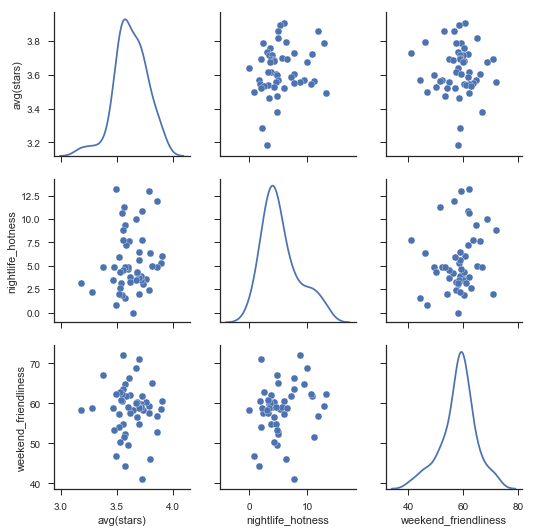

In [155]:
sns.pairplot(joined, diag_kind="kde")

### Step 10c: What is your interpretation of the correlations? 

None of the pairwise correlations are particularly strong, nor are the scatters. For example, we see that cities with an average rating of 3.5 stars are either not "friendly" (40) or particularly friendly (70). Most are about 60. The same applies to nightlife hotness and average stars.

Nightlife and weekend friendliness, however, seem to have a positive, if slight, correlation. This makes since -- nightlife venues are typically open on the weekends.

To improve this analysis -- so that we can learn something from the data -- you might pursue the following:
- Collapse by business type instead of cities. That way you'd see that, on average, across all cities, nightlife venues have higher stars, and tend to be open on the weekend.
- Calculate a weighted average stars by city, using the number of reviews.



In [156]:
all_nightlife = US_large.filter(US_large['nightlife indicator'] == 1).select('weekend indicator', 'stars', 'review_count')
all_nightlife = all_nightlife.toPandas()

In [157]:
all_nightlife.head(10)

,weekend indicator,stars,review_count
0,1,4.0,23
1,1,4.0,10
2,0,3.5,8
3,0,2.5,3
4,1,3.5,32
5,0,3.5,33
6,1,2.5,106
7,1,3.0,45
8,1,2.5,23
9,1,3.0,62


In [158]:
all_nightlife.corr()

,weekend indicator,stars,review_count
weekend indicator,1.000000,0.118772,0.219073
stars,0.118772,1.000000,0.093374
review_count,0.219073,0.093374,1.000000


This correlation matrix confirms some of our analysis in 10c. Weekend indicator and stars are positively correlated (whereas they were negatively correlated previously). We also learn that stars and review count are positively correlated, but not strongly. That suggests that weighting may not improve our analysis that much. But this is only the places with nightlife == 1, and using our entire dataset may tell a different story. Let's do that now:

In [159]:
# first, calculate the number of reviews per city. We'll continue to use US_large for consistency and comparability
reviews_by_city = US_large.groupBy('city').agg({'review_count': 'count'}).orderBy(['count(review_count)'], ascending=False)
reviews_by_city = reviews_by_city.withColumnRenamed('count(review_count)', 'review_count_city')
reviews_by_city = reviews_by_city.withColumnRenamed('city', 'city_v2')
reviews_by_city.show(5)

+----------+-----------------+
|   city_v2|review_count_city|
+----------+-----------------+
| Las Vegas|            19327|
|   Phoenix|            11852|
| Charlotte|             5695|
|Scottsdale|             5638|
|      Mesa|             3638|
+----------+-----------------+
only showing top 5 rows



In [160]:
# Now join column to original RDD (keeping as an RDD, and not a pandas dataframe makes computing easier and faster)
US_large = US_large.join(reviews_by_city, US_large.city == reviews_by_city.city_v2)

In [171]:
US_large = US_large.withColumn('weighting', (US_large.review_count/US_large.review_count_city))
US_large.weighting.describe().show()

TypeError: 'Column' object is not callable

In [161]:
# Now calculate the weighted average of review (at city level) for each business
US_large = US_large.withColumn('weighted stars', US_large.stars*(US_large.review_count/US_large.review_count_city))

In [162]:
US_large.show(1)

+--------------------+--------------------+--------------------+--------+--------------------+--------------------+----------+-----------+--------------------+-------------+----+------------+-----+-----+--------+-----------------+-------------------+--------+-----------------+------------------+
|          attributes|         business_id|          categories|    city|        full_address|               hours|  latitude|  longitude|                name|neighborhoods|open|review_count|stars|state|    type|weekend indicator|nightlife indicator| city_v2|review_count_city|    weighted stars|
+--------------------+--------------------+--------------------+--------+--------------------+--------------------+----------+-----------+--------------------+-------------+----+------------+-----+-----+--------+-----------------+-------------------+--------+-----------------+------------------+
|[true,null,null,f...|KayYbHCt-RkbGcPdG...|[Bars, American (...|Carnegie|141 Hawthorne St
...|[[02:00,11:00],

In [167]:
# Now groupby city
wavg_stars_by_city = US_large.groupBy('city_v2').agg({'weighted stars': 'sum'}).orderBy(['sum(weighted stars)'], ascending=True)
wavg_stars_by_city.show(5)

+-----------+-------------------+
|    city_v2|sum(weighted stars)|
+-----------+-------------------+
|  El Mirage|  44.59523809523809|
|  Mint Hill|              45.66|
|   Sun City|   46.0674603174603|
|    Buckeye|  48.49693251533742|
|Casa Grande|  49.51990049751245|
+-----------+-------------------+
only showing top 5 rows



### Above and Beyond
I ran out of time this week -- I was dealing with a personal issue on Sunday/Monday -- but you can see that I started to do some above and beyond work. Please consider this for several points (of course, not the full 20%). Thanks. Anthony

# END OF HOMEWORK 5